https://pvlib-python.readthedocs.io/en/latest/clearsky.html
# Clear Sky

This section reviews the clear sky modeling capabilities of pvlib-python.

pvlib-python supports two ways to generate clear sky irradiance:

    A Location object’s get_clearsky() method.
    The functions contained in the clearsky module, including ineichen() and simplified_solis().

Users that work with simple time series data may prefer to use get_clearsky(), while users that want finer control, more explicit code, or work with multidimensional data may prefer to use the basic functions in the clearsky module.

The Location subsection demonstrates the easiest way to obtain a time series of clear sky data for a location. The Ineichen and Perez and Simplified Solis subsections detail the clear sky algorithms and input data. The Detect Clearsky subsection demonstrates the use of the clear sky detection algorithm.

We’ll need these imports for the examples below.

In [5]:
In [1]: import os

In [2]: import itertools

In [3]: import matplotlib.pyplot as plt

In [4]: import pandas as pd

In [5]: import pvlib

In [6]: from pvlib import clearsky, atmosphere, solarposition

In [7]: from pvlib.location import Location
    
# In [8]: from pvlib.iotools import read_tmy3

# Location

The easiest way to obtain a time series of clear sky irradiance is to use a Location object’s get_clearsky() method. The get_clearsky() method does the dirty work of calculating solar position, extraterrestrial irradiance, airmass, and atmospheric pressure, as appropriate, leaving the user to only specify the most important parameters: time and atmospheric attenuation. The time input must be a pandas.DatetimeIndex, while the atmospheric attenuation inputs may be constants or arrays. The get_clearsky() method always returns a pandas.DataFrame.

In [6]:
latitude, longitude, tz = 32.2, -110.9, 'US/Arizona'

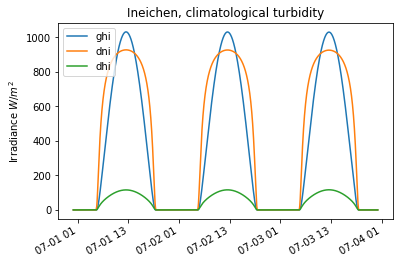

In [9]:
In [9]: tus = Location(32.2, -111, 'US/Arizona', 700, 'Tucson')
    
# tus = Location(latitude, longitude, tz, 700, 'Tucson')

In [10]: times = pd.DatetimeIndex(start='2016-07-01', end='2016-07-04', freq='1min', tz=tus.tz)

In [11]: cs = tus.get_clearsky(times)  # ineichen with climatology table by default

In [12]: cs.plot();

In [13]: plt.ylabel('Irradiance $W/m^2$');

In [14]: plt.title('Ineichen, climatological turbidity');

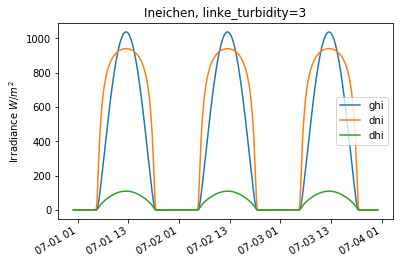

In [3]:
In [15]: cs = tus.get_clearsky(times, model='ineichen', linke_turbidity=3)

In [16]: cs.plot();

In [17]: plt.title('Ineichen, linke_turbidity=3');

In [18]: plt.ylabel('Irradiance $W/m^2$');

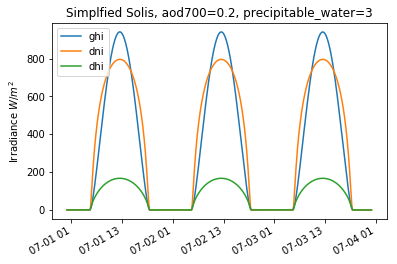

In [4]:
In [19]: cs = tus.get_clearsky(times, model='simplified_solis', aod700=0.2, precipitable_water=3)

In [20]: cs.plot();

In [21]: plt.title('Simplfied Solis, aod700=0.2, precipitable_water=3');

In [22]: plt.ylabel('Irradiance $W/m^2$');